## 1. Introduction to scipy.spatial
The scipy.spatial module deals with spatial data structures and algorithms, which are particularly useful for tasks such as distance computations, spatial queries, and more. Think of it as a toolkit for handling multi-dimensional data efficiently!

In the context of scipy.spatial, ODE (Ordinary Differential Equations) techniques may not directly relate, as scipy.spatial primarily focuses on spatial data structures and algorithms. However, I believe you might be looking for techniques related to spatial computations or possibly methods for solving differential equations that might involve spatial concepts.

If you meant ODE techniques from scipy.integrate that can interact with spatial problems, let's explore a range of relevant methods and techniques in scipy that are commonly used in spatial contexts, especially focusing on differential equations.

### Techniques for Solving Ordinary Differential Equations (ODEs) in scipy
1. First-Order ODEs
- First-order ODEs are the simplest form of differential equations. These can be solved using numerical methods.

In [2]:
from scipy.integrate import odeint
import numpy as np

# Define the model (dy/dt = -2y)
def model(y, t):
    dydt = -2 * y
    return dydt

# Initial condition
y0 = 1
# Time points
t = np.linspace(0, 5, 100)
print(t)

# Solve ODE
sol = odeint(model, y0, t)
print(sol)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

2. Second-Order ODEs
- Second-order ODEs can be reduced to a system of first-order ODEs.

In [6]:
# Define a second-order ODE: d²y/dt² = -y
def second_order(y, t):
    return [y[1], -y[0]]

# Initial conditions: y(0)=0, dy/dt(0)=1
y0 = [0, 1]

# Solve ODE
sol = odeint(second_order, y0, t)
print(sol)

[[ 0.          1.        ]
 [ 0.05048357  0.99872489]
 [ 0.10083841  0.99490282]
 [ 0.15093608  0.98854352]
 [ 0.20064884  0.97966323]
 [ 0.2498499   0.96828458]
 [ 0.29841379  0.95443659]
 [ 0.34621666  0.93815458]
 [ 0.3931366   0.91948007]
 [ 0.43905395  0.89846068]
 [ 0.48385162  0.87515003]
 [ 0.52741536  0.84960756]
 [ 0.56963409  0.8218984 ]
 [ 0.61040012  0.79209323]
 [ 0.64960949  0.76026804]
 [ 0.68716222  0.72650401]
 [ 0.72296254  0.69088723]
 [ 0.75691914  0.65350853]
 [ 0.78894544  0.61446325]
 [ 0.81895975  0.57385095]
 [ 0.84688554  0.5317752 ]
 [ 0.87265159  0.48834332]
 [ 0.89619218  0.44366605]
 [ 0.91744729  0.39785734]
 [ 0.9363627   0.351034  ]
 [ 0.95289019  0.30331546]
 [ 0.9669876   0.25482339]
 [ 0.97861898  0.20568147]
 [ 0.98775467  0.15601501]
 [ 0.99437137  0.10595069]
 [ 0.99845221  0.05561616]
 [ 0.99998678  0.0051398 ]
 [ 0.99897116 -0.04534966]
 [ 0.99540795 -0.09572347]
 [ 0.98930623 -0.14585317]
 [ 0.98068157 -0.19561091]
 [ 0.96955595 -0.2448698 ]
 

### Numerical Integration Methods
- Different methods are available for numerical integration, such as Euler’s method, Runge-Kutta, etc.

In [5]:
def runge_kutta(f, y0, t):
    y = np.empty((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + 0.5 * dt * k1, t[i-1] + 0.5 * dt)
        k3 = f(y[i-1] + 0.5 * dt * k2, t[i-1] + 0.5 * dt)
        k4 = f(y[i-1] + dt * k3, t[i-1] + dt)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

### 4. Stiff ODEs
- Stiff ODEs require specialized solvers. scipy.integrate provides methods like solve_ivp.

In [7]:
from scipy.integrate import solve_ivp

def stiff_ode(t, y):
    return [-1000 * y[0] + 3000 * y[1], 1000 * y[0] - 2000 * y[1]]

# Initial conditions
y0 = [1, 0]
t_span = (0, 1)

# Solve using solve_ivp
sol = solve_ivp(stiff_ode, t_span, y0, method='LSODA')
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.162e-08 ...  9.998e-01  1.000e+00]
        y: [[ 1.000e+00  1.000e+00 ...  3.851e+131  4.047e+131]
            [ 0.000e+00  3.162e-05 ...  1.672e+131  1.758e+131]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2607
     njev: 47
      nlu: 47


### 5. Boundary Value Problems (BVP)
- BVPs can be solved using scipy.integrate.solve_bvp.

In [8]:
from scipy.integrate import solve_bvp

def boundary_value_problem(x, y):
    return np.vstack((y[1], -y[0]))

def bc(ya, yb):
    return np.array([ya[0], yb[0] - 1])  # y(0) = 0, y(1) = 1

x = np.linspace(0, 1, 5)
y_guess = np.zeros((2, x.size))

sol = solve_bvp(boundary_value_problem, bc, x, y_guess)
print(sol)

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  2.500e-01  5.000e-01  7.500e-01  1.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x0000016561797390>
             p: None
             y: [[ 0.000e+00  2.940e-01  5.697e-01  8.101e-01  1.000e+00]
                 [ 1.188e+00  1.151e+00  1.043e+00  8.695e-01  6.421e-01]]
            yp: [[ 1.188e+00  1.151e+00  1.043e+00  8.695e-01  6.421e-01]
                 [-0.000e+00 -2.940e-01 -5.697e-01 -8.101e-01 -1.000e+00]]
 rms_residuals: [ 9.326e-05  7.197e-05  6.027e-05  5.877e-05]
         niter: 1


### 6. Adaptive Step Size
- Using adaptive step sizes helps in efficiently solving ODEs with varying scales.

In [9]:
sol = solve_ivp(stiff_ode, t_span, y0, method='RK45', t_eval=np.linspace(0, 1, 100))
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-02 ...  9.899e-01  1.000e+00]
        y: [[ 1.000e+00  1.360e+01 ...  9.348e+129  1.992e+131]
            [ 0.000e+00  5.907e+00 ...  4.065e+129  8.645e+130]]
      sol: None
 t_events: None
 y_events: None
     nfev: 6272
     njev: 0
      nlu: 0

### 7. Vector Field Plotting
- You can visualize the vector field of ODEs, which is helpful in understanding the dynamics.

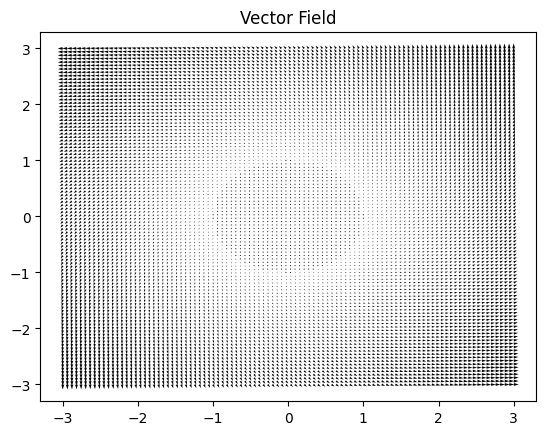

In [10]:
import matplotlib.pyplot as plt

Y1, Y2 = np.mgrid[-3:3:100j, -3:3:100j]
DX = Y1 - Y2
DY = Y1 + Y2
plt.quiver(Y1, Y2, DX, DY)
plt.title('Vector Field')
plt.show()